In [8]:
# Useful starting lines
%timeit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from preprocessing import *
from train_tune import *
from proj1_helpers import *

%load_ext autoreload
%autoreload 2
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 

#loading data
from preprocessing import cluster_preprocessing_train
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
name2num,num2name = mapping(DATA_TRAIN_PATH)
#Train preprocessing
print("THIS VERSION REMOVES THE 29TH COLUMN FROM CLUSTER0")
from preprocessing import cluster_preprocessing_train
tx0, y0, tx1, y1, tx2, y2, tx3, y3, id0, id1, id2, id3 = cluster_preprocessing_train(tx_train,y,num2name,f="median")

#K-fold CV
k_fold=10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
THIS VERSION REMOVES THE 29TH COLUMN FROM CLUSTER0
PREPROCESSING TRAIN DATA 
 Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

Getting indices of columns to remove before taking log.
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Taking the log of selected features

 Removing features where all rows are -999 or 0. Returning indices for later
Replacing -999 values with median
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done


In [9]:
def lossgraph(l0,l1,l2,l3,iters,deg,gamma):
    fig, axes = plt.subplots(2,2,figsize=(10,8),sharex =False)
    ax = axes.ravel()
    ax[0].plot(l0)
    ax[1].plot(l1)
    ax[2].plot(l2)
    ax[3].plot(l3)
    
    ax[0].set_title("Losses, Cluster = 0")
    ax[1].set_title("Losses, Cluster = 1")
    ax[2].set_title("Losses, Cluster = 2")
    ax[3].set_title("Losses, Cluster = 3")
    
    ax[0].set_xlabel("ITERATIONS")
    ax[1].set_xlabel("ITERATIONS")
    ax[2].set_xlabel("ITERATIONS")
    ax[3].set_xlabel("ITERATIONS")
    
    fig.suptitle("ReguLog losses, for clusters, n_iters = {} \n deg = {}, gamma = {}".format(n_iters, deg,gamma))

In [11]:
tx01.shape
tx0.shape

(99913, 19)

In [13]:
tx01.shape

(99913, 20)

In [20]:
degs = [1,2,3,4]

tx01 = build_poly(tx0,degs[0])
tx11 = build_poly(tx1,degs[0])
tx21 = build_poly(tx2,degs[0])
tx31 = build_poly(tx3,degs[0])

tx02 = build_poly(tx0,degs[1])
tx12 = build_poly(tx1,degs[1])
tx22 = build_poly(tx2,degs[1])
tx32 = build_poly(tx3,degs[1])

tx03 = build_poly(tx0,degs[2])
tx13 = build_poly(tx1,degs[2])
tx23 = build_poly(tx2,degs[2])
tx33 = build_poly(tx3,degs[2])

tx04 = build_poly(tx0,degs[3])
tx14 = build_poly(tx1,degs[3])
tx24 = build_poly(tx2,degs[3])
tx34 = build_poly(tx3,degs[3])


Iterating over 1500 epochs
Iterating over 1500 epochs
Iterating over 1500 epochs
Iterating over 1500 epochs


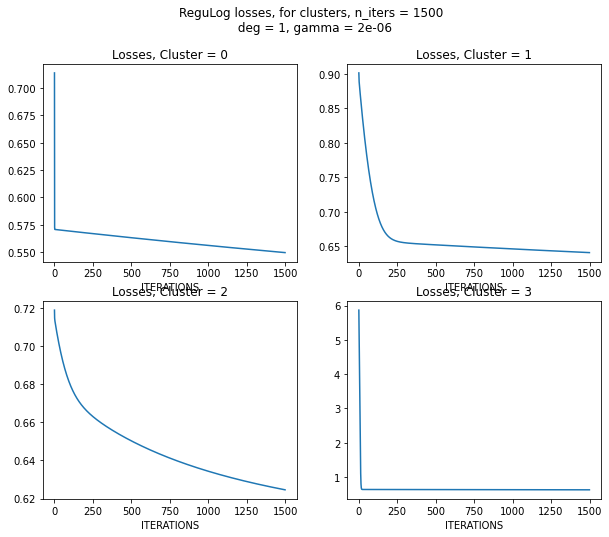

In [21]:
w_init0 = np.random.randn(tx01.shape[1],1) 
w_init1 = np.random.randn(tx11.shape[1],1)
w_init2 = np.random.randn(tx21.shape[1],1)
w_init3 = np.random.randn(tx31.shape[1],1)

n_iters = 1500
gamma = 2e-6
_, _, l0 = logistic_regression(y0, tx01, w_init0, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l1 = logistic_regression(y1, tx11, w_init1, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l2 = logistic_regression(y2, tx21, w_init2, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l3 = logistic_regression(y3, tx31, w_init3, n_iters, gamma, tol = 1e-10,graphlosses= True)

lossgraph(l0,l1,l2,l3, n_iters,degs[0],gamma)

In [41]:
l1[-1]

0.6134133712320541

0.55895956156489 0.6200183344013948 0.6172060662376627 0.6943067803006191


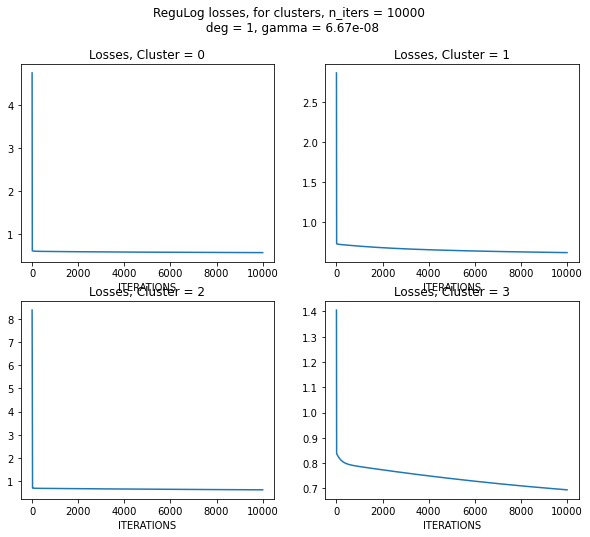

In [43]:
w_init0 = np.random.randn(tx02.shape[1],1) 
w_init1 = np.random.randn(tx12.shape[1],1)
w_init2 = np.random.randn(tx22.shape[1],1)
w_init3 = np.random.randn(tx32.shape[1],1)
la = 6.67e-7
n_iters = 10000
gamma = 6.67e-8
_, _, l0 = reg_logistic_regression(y0, tx02,la, w_init0, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l1 = reg_logistic_regression(y1, tx12,la, w_init1, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l2 = reg_logistic_regression(y2, tx22,la, w_init2, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l3 = reg_logistic_regression(y3, tx32,la, w_init3, n_iters, gamma, tol = 1e-10,graphlosses= True)

lossgraph(l0,l1,l2,l3, n_iters,degs[1],gamma)
print(l0[-1],l1[-1],l2[-1],l3[-1])

Iterating over 1500 epochs
Iterating over 1500 epochs
Iterating over 1500 epochs
Iterating over 1500 epochs


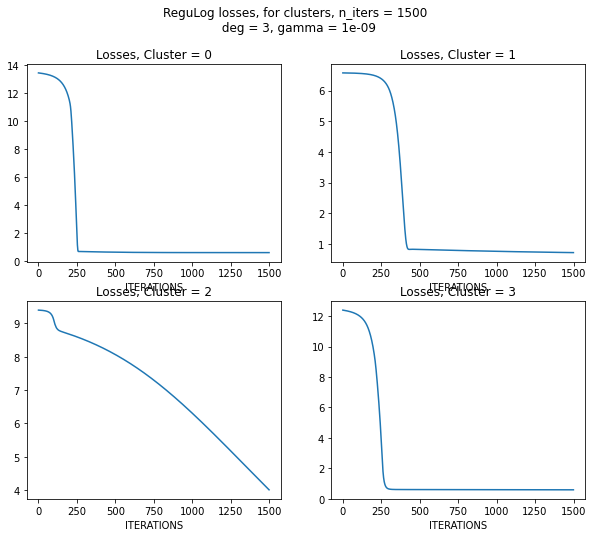

In [23]:
w_init0 = np.random.randn(tx03.shape[1],1) 
w_init1 = np.random.randn(tx13.shape[1],1)
w_init2 = np.random.randn(tx23.shape[1],1)
w_init3 = np.random.randn(tx33.shape[1],1)

n_iters = 1500
gamma = 1e-9
_, _, l0 = logistic_regression(y0, tx03, w_init0, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l1 = logistic_regression(y1, tx13, w_init1, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l2 = logistic_regression(y2, tx23, w_init2, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l3 = logistic_regression(y3, tx33, w_init3, n_iters, gamma, tol = 1e-10,graphlosses= True)

lossgraph(l0,l1,l2,l3, n_iters,degs[2],gamma)

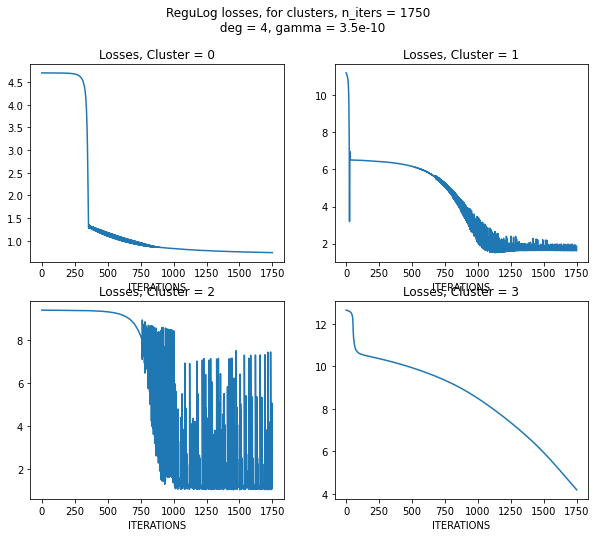

In [35]:
w_init0 = np.random.randn(tx04.shape[1],1) 
w_init1 = np.random.randn(tx14.shape[1],1)
w_init2 = np.random.randn(tx24.shape[1],1)
w_init3 = np.random.randn(tx34.shape[1],1)
la = 5e-8
n_iters = 1750
gamma = 3.5e-10
_, _, l0 = reg_logistic_regression(y0, tx04,la, w_init0, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l1 = reg_logistic_regression(y1, tx14,la, w_init1, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l2 = reg_logistic_regression(y2, tx24,la, w_init2, n_iters, gamma, tol = 1e-10,graphlosses= True)
_, _, l3 = reg_logistic_regression(y3, tx34,la, w_init3, n_iters, gamma, tol = 1e-10,graphlosses= True)

lossgraph(l0,l1,l2,l3, n_iters,degs[3],gamma)

0.536869034866908 0.627827091342123 0.6039357649985453 0.6125922623421509


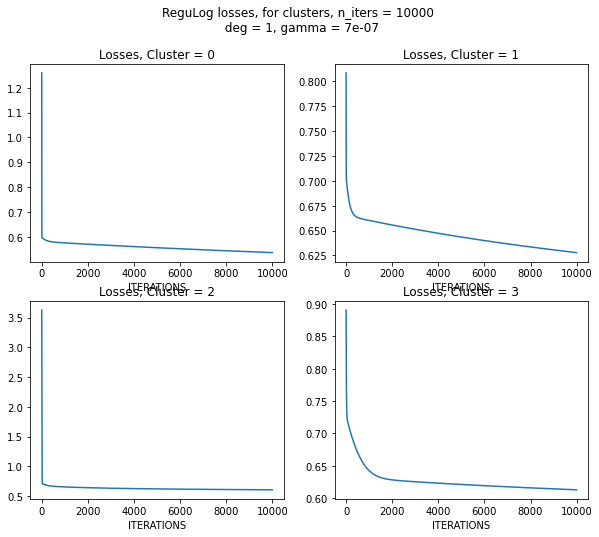

In [44]:
w_init0 = np.random.randn(tx01.shape[1],1) 
w_init1 = np.random.randn(tx11.shape[1],1)
w_init2 = np.random.randn(tx21.shape[1],1)
w_init3 = np.random.randn(tx31.shape[1],1)
la = 3.78e-8
n_iters = 10000
gamma = 7e-7
w_log_opt0, _, l0 = reg_logistic_regression(y0, tx01,la, w_init0, n_iters, gamma, tol = 1e-10,graphlosses= True)
w_log_opt1, _, l1 = reg_logistic_regression(y1, tx11,la, w_init1, n_iters, gamma, tol = 1e-10,graphlosses= True)
w_log_opt2, _, l2 = reg_logistic_regression(y2, tx21,la, w_init2, n_iters, gamma, tol = 1e-10,graphlosses= True)
w_log_opt3, _, l3 = reg_logistic_regression(y3, tx31,la, w_init3, n_iters, gamma, tol = 1e-10,graphlosses= True)
print(l0[-1],l1[-1],l2[-1],l3[-1])
lossgraph(l0,l1,l2,l3, n_iters,degs[0],gamma)

In [45]:
#TESTING PART

#Getting test-data
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' 
#Test preprocessing
degs = [1,1,1,1]
test0, i0, test1, i1, test2, i2, test3, i3 = cluster_preprocessing_test(tX_test, id0, id1,
                                                                 id2, id3, degs, num2name)
#Prediction

yclusterpred_log = cluster_predict(w_log_opt0,w_log_opt1,w_log_opt2,w_log_opt3,
                               test0,test1,test2,test3,
                               i0,i1,i2,i3,how="log")

create_csv_submission(ids_test, yclusterpred_log, OUTPUT_PATH+"LogAdjustedThreshold.csv")

PREPROCESSING TEST DATA 
 Clustering w.r.t. to PRI_jet_num numbers
No targets detected. Using a test-set. 
 Returning clusterized dataset and indices. 

Taking the log of selected features : 


 Deleting columns where all rows are -999 or 0.
Replacing -999 values with median
Standardizing : Setting mean to 0 and variance to 1
Augmenting features
Preprocessing done, returning clusterized test set and indices
Prediction for log regression
